# Summary

#### 1. Importing libraries and data

#### 2. Data prep for regression analysis

#### 3. Regression analysis

# 1. Importing libraries and date

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import data
path = r'C:\Users\Logan\OneDrive\Desktop\Data Immersion\Achievement 6_Advanced Analytics and Dashboard Design'

df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','6.1 Task - Source Open Data.csv'))

In [3]:
df.shape

(7043, 41)

In [4]:
print('# of Rows: {} / # of Columns: {}'.format(df.shape[0], df.shape[1]))
print('Columns are: '+ str(list(df.columns)))
df.head()

# of Rows: 7043 / # of Columns: 41
Columns are: ['Unnamed: 0', 'Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason', 'State', 'Country']


,Unnamed: 0,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,State,Country
0,0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,...,593.30,0.00,0,381.51,974.81,Stayed,Not Provided,Not Provided,California,United States
1,1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,...,542.40,38.33,10,96.21,610.28,Stayed,Not Provided,Not Provided,California,United States
2,2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,...,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,California,United States
3,3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,...,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,California,United States
4,4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,...,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,California,United States


In [17]:
# encode Cutommer Status as numbers
df['Customer Status N'] = pd.factorize(df['Customer Status'])[0]

In [21]:
# number stayed, churned, joined as numbers
df[['Customer Status','Customer Status N']].value_counts()

Customer Status  Customer Status N
Stayed           0                    4720
Churned          1                    1869
Joined           2                     454
dtype: int64

In [25]:
# drop unnamed: 0
df.drop(columns = 'Unnamed: 0', inplace = True)

In [26]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status N
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.446612,25.065455,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056,0.394292
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,13.495466,17.466342,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542,0.606466
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000,0.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,14.455000,15.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000,0.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000,0.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,36.395000,27.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,1.000000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,2.000000


<AxesSubplot:xlabel='Total Charges', ylabel='Count'>

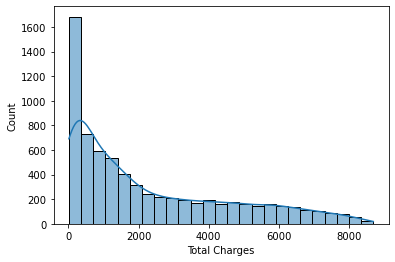

In [32]:
# Extreme values check
sns.histplot(df['Total Charges'], bins =25,kde=True)

<AxesSubplot:>

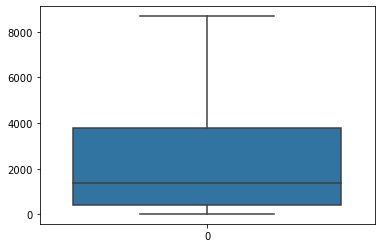

In [34]:
sns.boxplot(data=df['Total Charges'])

# 2. Data prep for regression analysis

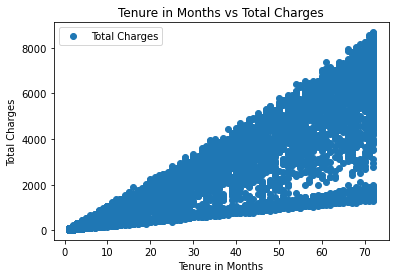

In [74]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Tenure in Months', y='Total Charges',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Tenure in Months vs Total Charges')  
plt.xlabel('Tenure in Months')  
plt.ylabel('Total Charges')  
plt.show()

In [47]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Tenure in Months'].values.reshape(-1,1)
y = df['Total Charges'].values.reshape(-1,1)

In [48]:
X

array([[ 9],
       [ 9],
       [ 4],
       ...,
       [ 2],
       [67],
       [63]], dtype=int64)

In [49]:
y

array([[ 593.3 ],
       [ 542.4 ],
       [ 280.85],
       ...,
       [  92.75],
       [4627.65],
       [3707.6 ]])

In [50]:
#  split each variable into a training and test set 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =0)

# 4. Regression Analysis

In [51]:
# Create a regression object
regression = LinearRegression()

In [52]:
# Fit the regression object to the train set
regression.fit(X_train, y_train)

LinearRegression()

In [53]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

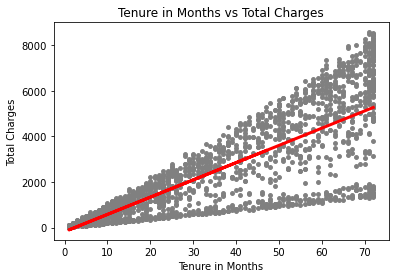

In [66]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Tenure in Months vs Total Charges')  
plot_test.xlabel('Tenure in Months')
plot_test.ylabel('Total Charges')
plot_test.show()

In [56]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [57]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[75.63226944]]
Mean squared error:  1612807.8364070044
R2 score:  0.6930021154260455


##### Summary of Regression Analysis
Slope: As tenure in months increases, total charges is increasing at a rate of ~75

Mean squared error: This is an extremely high value. This means that that the regression line is farther away from the data points. As a result, the regression line is not an accurate representation of the data.

R2 score: Model does not explain variance in data well either at a value of 0.69.


In [58]:
y_predicted

array([[3375.99231374],
       [-103.09208052],
       [3149.09550542],
       ...,
       [4056.6827387 ],
       [2090.24373325],
       [5266.79904975]])

In [59]:
# Create a dataframe comparing the actual and predicted values of y.
# By comparing the actual values from the predicted values manually using nothing but your eyes
# you can see for yourself how far off or close the model is.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4137.20,3375.992314
1,93.30,-103.092081
2,905.55,3149.095505
3,1551.60,4434.844086
4,2651.20,3451.624583
5,609.10,2165.876003
6,4116.15,3602.889122
7,1337.50,5039.902241
8,2224.50,2770.934158
9,1461.15,1031.391961


#### Compare how the regression fits the training set

In [60]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [61]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [62]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[75.63226944]]
Mean squared error:  1639143.6018371913
R2 score:  0.6775905231876608


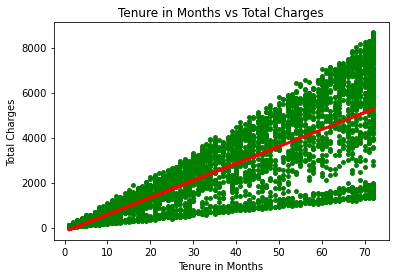

In [67]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Tenure in Months vs Total Charges')  
plot_test.xlabel('Tenure in Months')
plot_test.ylabel('Total Charges')
plot_test.show()

Summary of Regression Analysis
Slope: As tenure in months increases, total charges is increasing at a rate of ~75

Mean squared error: This is an extremely high value. This means that that the regression line is farther away from the data points. As a result, the regression line is not an accurate representation of the data.

R2 score: Model does not explain variance in data well either at a value of 0.67.

Overall, model is not a great fit for data based on model summary statistics. This is also clearly seen when looking at Actual vs. predicted.